# **AP157 Machine Learning Lab Assignment**
### Module B1: Digital Image Formation and Enhancement

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1 and 2 are worth 20 and 80 points, respectively).

_Credits_: This lab assignment is based on the AP157 modules of Dr. Maricor Soriano and scripts created by Mr. Rene Principe

### Student Information

_Full Name (Last Name, First Name)_: Quiamjot, Allyn Christian\
_Student No._: 2021-07198\
_Section_: TX-2

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: ALLYN CHRISTIAN QUIAMJOT**

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/30
* Part 2 - []/30
* Part 3 - []/40

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

In [7]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#### PART 1 - Create synthetic greyscale images *(30 points)*

Simulate a 1 cm x 1 cm optical element with a sinusoid along the x-direction with a given frequency-- generate images with frequencies of 1, 3, and 5 cycles/cm. The size of each image should be 400x400 pixels.

For each frequency, show the:
1. [15 pts.; 5 pts. each] Image heatmap (range of pixel values should be between 0 to 255)
2. [15 pts.; 5 pts. each] Plot showing 3-D view



Sample output for frequency of 5 cycles/cm is uploaded to the Google Drive Datasets folder: https://drive.google.com/file/d/1770FiH4FPm0C_fCpRGorr64x-RIv9UOY/view?usp=drive_link



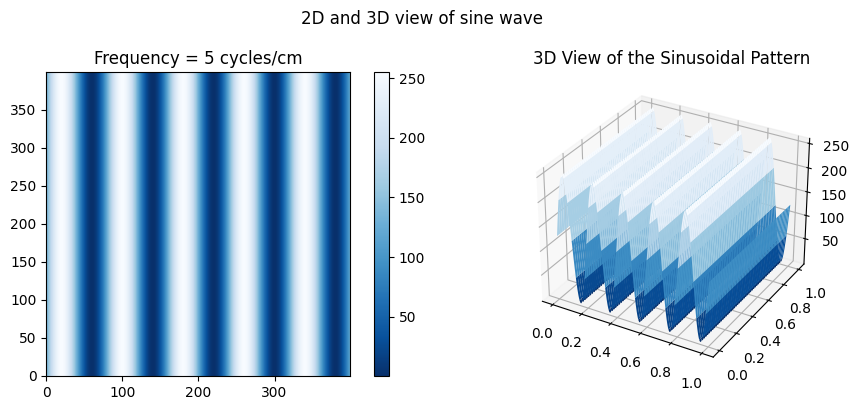

In [8]:
import matplotlib.pyplot as plt 
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

N = 256
res = 400
size = 1    # cm
freq = 5    # cycles/cm
pts = np.linspace(0, size, res)
X, Y = np.meshgrid(pts,pts)

fx = (255/2)*np.sin(2*np.pi*freq*X) + (255/2)

plt.figure(figsize=(10,4))


plt.subplot(121)
plt.imshow(fx, cmap="Blues_r",origin='lower')
plt.title('Frequency = '+str(freq) + ' cycles/cm')
plt.colorbar()

ax1 = plt.subplot(122, projection='3d')
ax1.plot_surface(X, Y, fx, cmap='Blues_r')
plt.title('3D View of the Sinusoidal Pattern')
plt.suptitle('2D and 3D view of sine wave')

plt.tight_layout()
plt.show()

#### PART 2 - Create color images *(30 points)*

Recreate the Olympics logo as an image. It is fine if the colors overlap where the rings intersect.

Sample output is uploaded to the Google Drive Datasets folder: https://drive.google.com/file/d/1770FiH4FPm0C_fCpRGorr64x-RIv9UOY/view?usp=drive_link

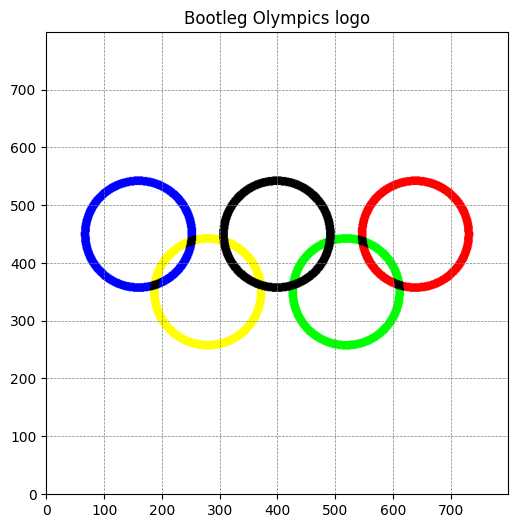

In [9]:
import matplotlib.pyplot as plt 
import numpy as np

# cmap ="Blues"
N = 800
radius = 1

inner_radius = radius * 0.85
outer_radius = radius * 1

xx = np.linspace(-4, 4 ,N)
Xx, Yy = np.meshgrid(xx,xx)
yoffset = 0.5
xoffset = 1.2

R1 = np.sqrt((Xx + 2 * xoffset)**2 + (Yy - yoffset)**2)
R2 = np.sqrt((Xx + 1 * xoffset)**2 + (Yy + yoffset)**2)
R3 = np.sqrt((Xx)**2 + (Yy - yoffset)**2)
R4 = np.sqrt((Xx - 1 * xoffset)**2 + (Yy + yoffset)**2)
R5 = np.sqrt((Xx - 2 * xoffset)**2 + (Yy - yoffset)**2)

# Initialize arrays for red, green, and blue channels
Rd, Gn, Bl = np.ones((N, N)), np.ones((N, N)), np.ones((N, N))

# 1st circle
Rd[np.where((R1 < outer_radius) & (R1 >= inner_radius))] = 0
Gn[np.where((R1 < outer_radius) & (R1 >= inner_radius))] = 0

# 2nd circle
Bl[np.where((R2 < outer_radius) & (R2 >= inner_radius))] = 0

# 3rd circle
Rd[np.where((R3 < outer_radius) & (R3 >= inner_radius))] = 0
Gn[np.where((R3 < outer_radius) & (R3 >= inner_radius))] = 0
Bl[np.where((R3 < outer_radius) & (R3 >= inner_radius))] = 0

# 4th circle
Bl[np.where((R4 < outer_radius) & (R4 >= inner_radius))] = 0
Rd[np.where((R4 < outer_radius) & (R4 >= inner_radius))] = 0

# 5th circle
Gn[np.where((R5 < outer_radius) & (R5 >= inner_radius))] = 0
Bl[np.where((R5 < outer_radius) & (R5 >= inner_radius))] = 0

I_rgb = np.ones((N, N, 3))
I_rgb[..., 0] = Rd
I_rgb[..., 1] = Gn
I_rgb[..., 2] = Bl

plt.figure(figsize=(8, 6))
# plt.axis('off')
plt.title('Bootleg Olympics logo')
plt.grid(color='grey', linestyle='--', linewidth=0.5)
plt.imshow(I_rgb, origin='lower')
plt.show()

#### PART 3 - Apply image enhancement *(40 points)*

Apply contrast stretching to an astronaut image.

Show the following:
1. [20 pts.] Original and contrast-stretched image
2. [10 pts.] Probability Distribution Function (PDF) plot showing curves for the original and contrast-stretched image
3. [10 pts.] Cumulative Distribution Function (CDF) plot showing curves for the original and contrast-stretched image

Sample output is uploaded to the Google Drive Datasets folder: https://drive.google.com/file/d/12-cPwAr7hVUPBKIthvcQgvqjvEOmwyxJ/view?usp=drive_link

First step is to load the image-- available from the scikit-image (skimage) library-- and make a low-contrast version, using the code below:

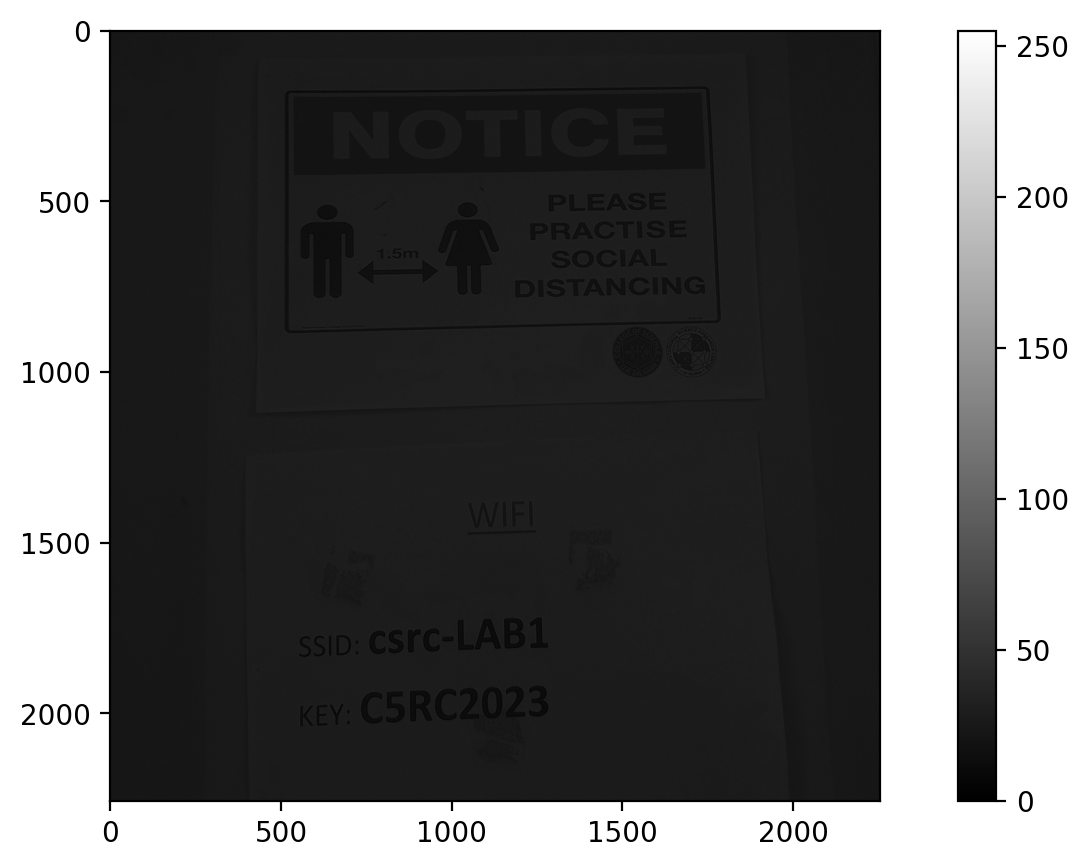

In [10]:
from skimage import color, io, data
from skimage.transform import rescale

path = "pics/"
leaked_pics = io.imread(path + 'csrc.jpg')      #try csrc.jpg, gwapo.jpg, katip.jpg, rooftop.jpg, fog.jpg & sunken.jpg
# leaked_pics = data.astronaut()
img = color.rgb2gray(leaked_pics)*255 # original image
plt.figure(figsize=(10,5), dpi = 200)
plt.imshow(img, cmap = 'gray', vmin = 0, vmax = 255)
plt.colorbar()

Next, write your code to apply contrast stretching, calculate the PDF and CDF of the original and contrast-stretched images. Finally, display the images and PDF and CDF plots.

In [11]:
print(img.min())
print(img.max())

0.6450999999999999
62.592200000000005


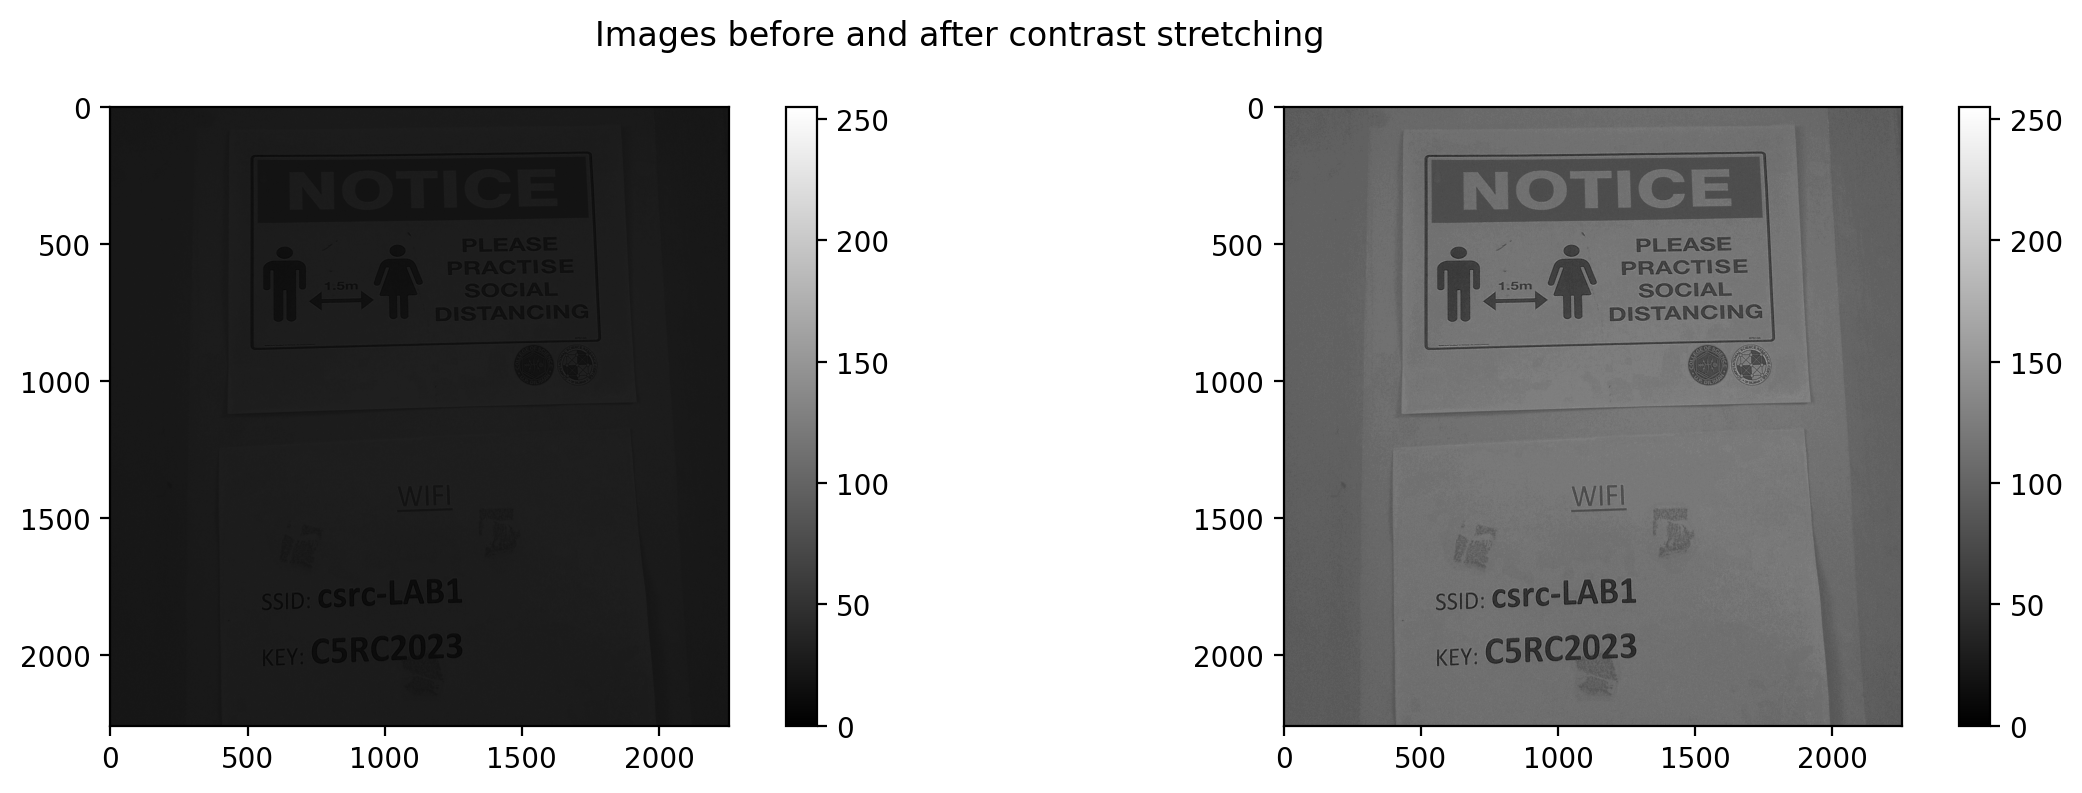

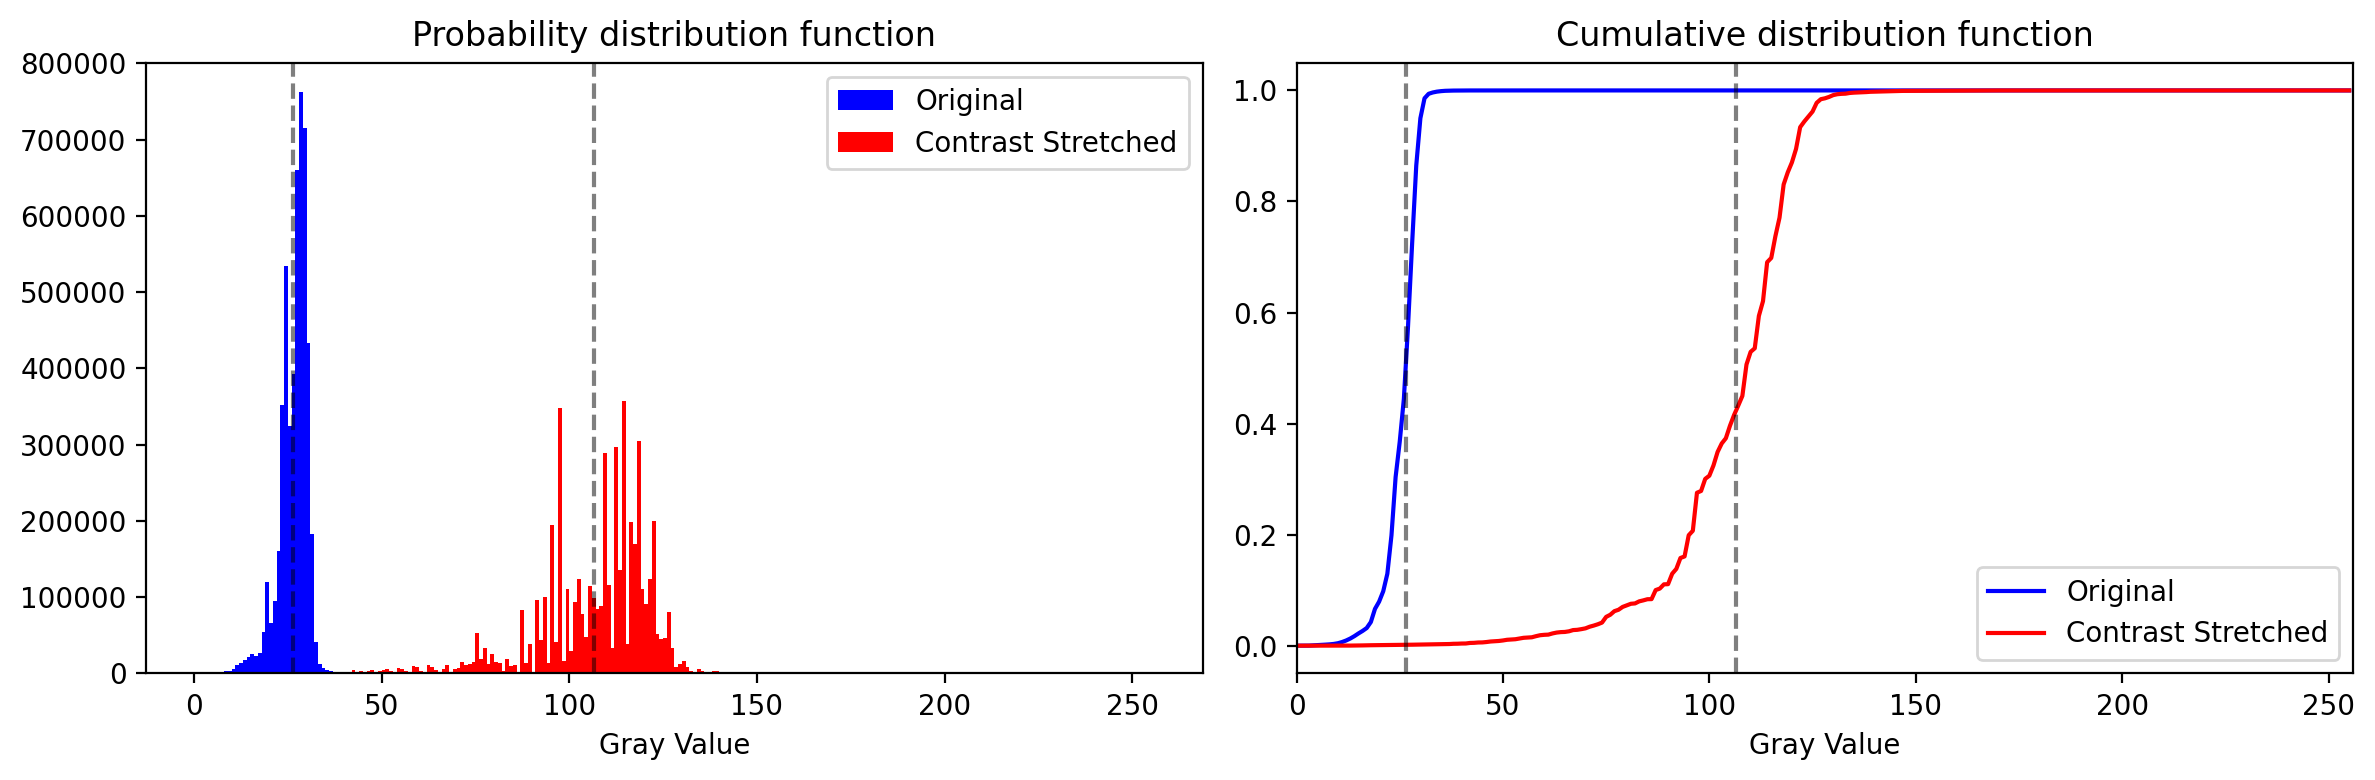

In [12]:
def contrast_stretch(image):
    ratio = 255 / (image.max() - image.min())
    stretched = (image - np.min(image)) * ratio
    return stretched

def plotting_pdf_cdf(img_orig, img_stretched):
    orig = img_orig.flatten()
    stretch = img_stretched.flatten()

    plt.figure(figsize=(12,4),dpi = 200)

    plt.subplot(121)
    pdf, bins, _ = plt.hist(orig, bins=256, range=[0, 256], color='blue', label = 'Original')
    pdff, binss, _ = plt.hist(stretch, bins=256, range=[0, 256], color='red', label = 'Contrast Stretched')
    plt.title('Probability distribution function')
    plt.axvline(np.mean(img), color = 'black', linestyle='--', alpha = 0.5)
    plt.axvline(np.mean(stretched), color = 'black', linestyle='--', alpha = 0.5)
    plt.xlabel('Gray Value')
    plt.legend()

    cdf = pdf.cumsum()
    cdf = cdf / cdf[-1]  # Normalize
    cdff = pdff.cumsum()
    cdff = cdff / cdff[-1]  # Normalize
    
    plt.subplot(122)
    plt.plot(bins[:-1], cdf, color='blue', label = 'Original')
    plt.plot(binss[:-1], cdff, color='red', label = 'Contrast Stretched')
    plt.axvline(np.mean(img), color = 'black', linestyle='--', alpha = 0.5)
    plt.axvline(np.mean(stretched), color = 'black', linestyle='--', alpha = 0.5)
    plt.title('Cumulative distribution function')
    plt.xlabel('Gray Value')
    plt.xlim([0, 256])
    plt.legend()

    plt.tight_layout()
    plt.show()

stretched = contrast_stretch(img)

plt.figure(figsize=(12,4), dpi = 200)

plt.suptitle("Images before and after contrast stretching")
plt.subplot(121)
plt.imshow(img, cmap = 'gray', vmin = 0, vmax = 255)
plt.colorbar()
plt.subplot(122)
plt.imshow(stretched, cmap = 'gray', vmin = 0, vmax = 255)
plt.colorbar()
plt.tight_layout()
plt.show()

plotting_pdf_cdf(img, stretched)